In [1]:
# Importing required modules
import pandas as pd          
import numpy as np               
import matplotlib.pyplot as plt   
import datetime as dt
from datetime import datetime    
from pandas import Series         
%matplotlib inline 

import warnings                   
warnings.filterwarnings("ignore")


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [2]:
df = pd.read_csv("C:/Users/user.DESKTOP-OMQ89VA/Downloads/ADANIPORTS.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
# For the sake of this notebook, I shall limit the number of columns to keep things simple. 

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2993 non-null   object 
 1   Open    2993 non-null   float64
 2   High    2993 non-null   float64
 3   Low     2993 non-null   float64
 4   Close   2993 non-null   float64
 5   Volume  2993 non-null   int64  
 6   VWAP    2993 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 163.8+ KB


In [6]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2007-11-27,770.00,1050.00,770.0,962.90,27294366,984.72
1,2007-11-28,984.00,990.00,874.0,893.90,4581338,941.38
2,2007-11-29,909.00,914.75,841.0,884.20,5124121,888.09
3,2007-11-30,890.00,958.00,890.0,921.55,4609762,929.17
4,2007-12-03,939.75,995.00,922.0,969.30,2977470,965.65


In [7]:
#Manipulating datetime-
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [8]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [9]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [10]:
print(data.index.max())
print(data.index.min())

2992
0


In [11]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  2992


In [12]:
#Feature Extraction-
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.head()

,Date,VWAP
0,2007-11-27,984.72
1,2007-11-28,941.38
2,2007-11-29,888.09
3,2007-11-30,929.17
4,2007-12-03,965.65


In [13]:
#extract the year, month, day, day of the week from the Date column.
# 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

In [14]:
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,984.72,2007,11,27,1
2007-11-28,941.38,2007,11,28,2
2007-11-29,888.09,2007,11,29,3
2007-11-30,929.17,2007,11,30,4
2007-12-03,965.65,2007,12,3,0


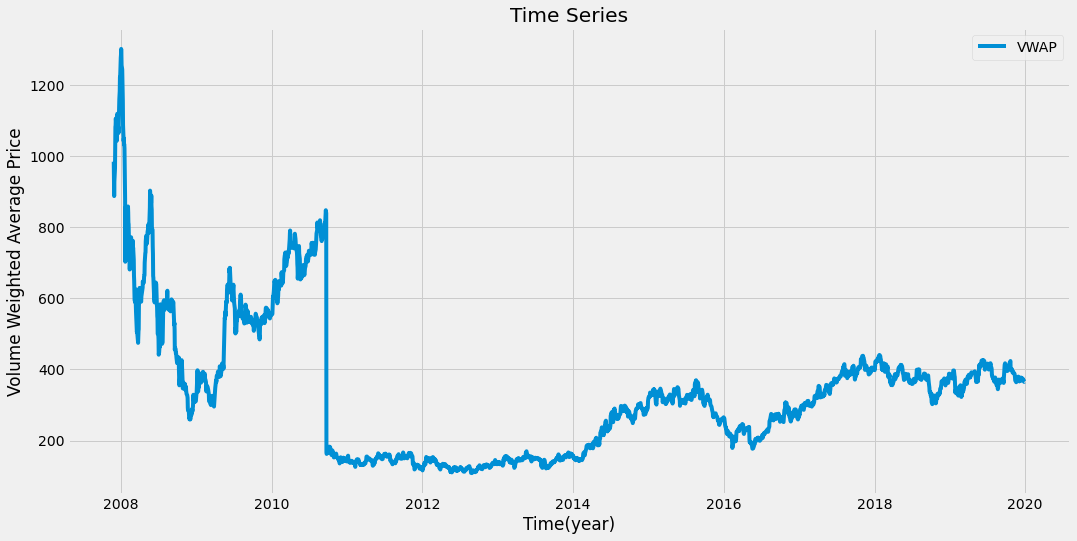

In [15]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap['VWAP'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<AxesSubplot:xlabel='year'>

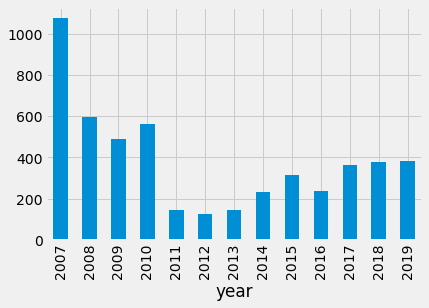

In [16]:
#Exploratory Data Analysis-
# Yearly VWAP of Maruti Stocks

df_vwap.groupby('year')['VWAP'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

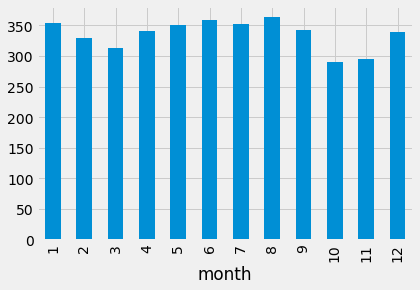

In [17]:
# Monthly VWAP of Maruti Stocks

df_vwap.groupby('month')['VWAP'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

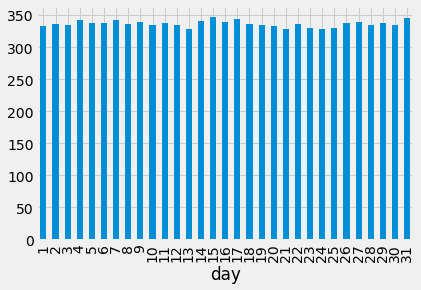

In [18]:
# Daily VWAP of Maruti Stocks

df_vwap.groupby('day')['VWAP'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

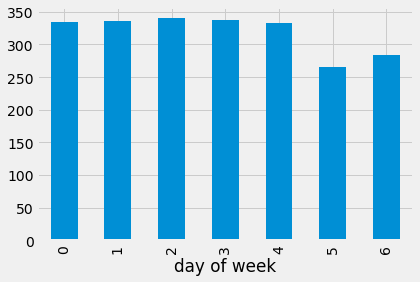

In [19]:
# Analysing w.r.t day of the week

df_vwap.groupby('day of week')['VWAP'].mean().plot.bar()

In [20]:
#Time resampling-
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2007-12-31,1078.949565,2007.0,11.826087,17.782609,1.956522
2008-12-31,595.471016,2008.0,6.443089,15.821138,1.955285
2009-12-31,490.940370,2009.0,6.580247,15.761317,2.041152
2010-12-31,560.167460,2010.0,6.599206,15.710317,1.992063
2011-12-31,144.778640,2011.0,6.516000,15.796000,1.992000


In [21]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,984.72,2007,11,27,1
2007-11-28,941.38,2007,11,28,2
2007-11-29,888.09,2007,11,29,3
2007-11-30,929.17,2007,11,30,4
2007-12-03,965.65,2007,12,3,0


In [22]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,NaN,NaN,NaN,NaN,NaN
2007-11-28,984.72,2007.0,11.0,27.0,1.0
2007-11-29,941.38,2007.0,11.0,28.0,2.0
2007-11-30,888.09,2007.0,11.0,29.0,3.0
2007-12-03,929.17,2007.0,11.0,30.0,4.0


<AxesSubplot:xlabel='Date'>

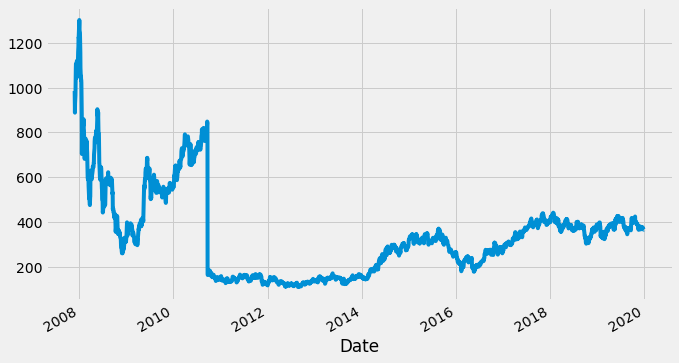

In [23]:
#Rolling windows-
df_vwap['VWAP'].plot(figsize = (10,6))

In [25]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,NaN,NaN,NaN,NaN,NaN
2007-11-28,NaN,NaN,NaN,NaN,NaN
2007-11-29,NaN,NaN,NaN,NaN,NaN
2007-11-30,NaN,NaN,NaN,NaN,NaN
2007-12-03,NaN,NaN,NaN,NaN,NaN
2007-12-04,NaN,NaN,NaN,NaN,NaN
2007-12-05,972.455714,2007.0,11.428571,18.000000,1.857143
2007-12-06,987.071429,2007.0,11.571429,15.000000,2.142857
2007-12-07,1010.670000,2007.0,11.714286,12.000000,2.428571


<AxesSubplot:xlabel='Date'>

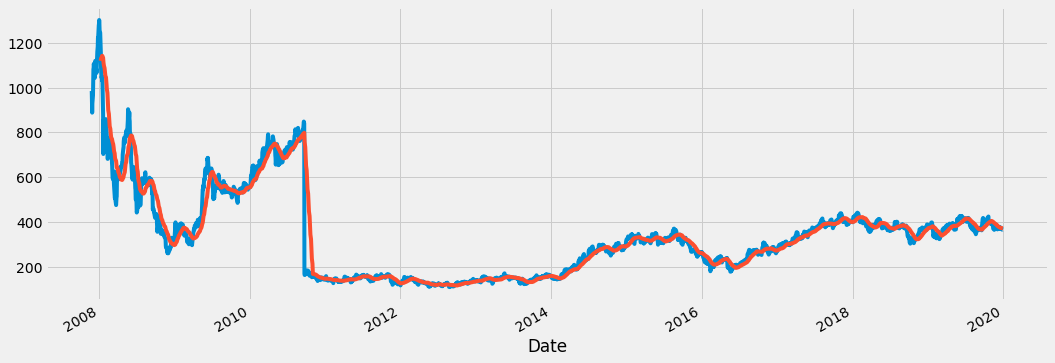

In [26]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))